## Imports

In [11]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [12]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    u[0,:]=1
    u[col-1,:]=1
    u[:,0]=1
    u[:,row-1]=1
    v[0,:]=1
    v[col-1,:]=1
    v[:,0]=1
    v[:,row-1]=1
    for n in range(nt):
        for i in range(1,row-1):
            for j in range(1,col-1):
                u[i,j]=u[i,j]-(dt/dx)*u[i,j]*(u[i,j]-u[i-1,j])-v[i,j]*(dt/dy)*(u[i,j]-u[i,j-1])+nu*(dt/dx**2)*(u[i+1,j]-2*u[i,j]+u[i-1,j])+nu*(dt/dy**2)*(u[i,j+1]-2*u[i,j]+u[i,j-1])
                v[i,j]=v[i,j]-(dt/dx)*u[i,j]*(v[i,j]-v[i-1,j])-v[i,j]*(dt/dy)*(v[i,j]-v[i,j-1])+nu*(dt/dx**2)*(v[i+1,j]-2*v[i,j]+v[i-1,j])+nu*(dt/dy**2)*(v[i,j+1]-2*v[i,j]+v[i,j-1])
        
        
    return 0

## Numba accelerator

In [13]:
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    u[0,:]=1
    u[col-1,:]=1
    u[:,0]=1
    u[:,row-1]=1
    v[0,:]=1
    v[col-1,:]=1
    v[:,0]=1
    v[:,row-1]=1
    for n in range(nt):
        for i in range(1,row-1):
            for j in range(1,col-1):
                u[i,j]=u[i,j]-(dt/dx)*u[i,j]*(u[i,j]-u[i-1,j])-v[i,j]*(dt/dy)*(u[i,j]-u[i,j-1])+nu*(dt/dx**2)*(u[i+1,j]-2*u[i,j]+u[i-1,j])+nu*(dt/dy**2)*(u[i,j+1]-2*u[i,j]+u[i,j-1])
                v[i,j]=v[i,j]-(dt/dx)*u[i,j]*(v[i,j]-v[i-1,j])-v[i,j]*(dt/dy)*(v[i,j]-v[i,j-1])+nu*(dt/dx**2)*(v[i+1,j]-2*v[i,j]+v[i-1,j])+nu*(dt/dy**2)*(v[i,j+1]-2*v[i,j]+v[i,j-1])
        
    return 0

## Pyccel accelerator

In [14]:
@types('float[:,:]', 'float[:,:]','float[:,:]','float[:,:]','int','float','float','float', 'float')
def solve_2d_burger_pyccel(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    u[0,:]=1
    u[col-1,:]=1
    u[:,0]=1
    u[:,row-1]=1
    v[0,:]=1
    v[col-1,:]=1
    v[:,0]=1
    v[:,row-1]=1
    for n in range(nt):
        for i in range(1,row-1):
            for j in range(1,col-1):
                u[i,j]=u[i,j]-(dt/dx)*u[i,j]*(u[i,j]-u[i-1,j])-v[i,j]*(dt/dy)*(u[i,j]-u[i,j-1])+nu*(dt/dx**2)*(u[i+1,j]-2*u[i,j]+u[i-1,j])+nu*(dt/dy**2)*(u[i,j+1]-2*u[i,j]+u[i,j-1])
                v[i,j]=v[i,j]-(dt/dx)*u[i,j]*(v[i,j]-v[i-1,j])-v[i,j]*(dt/dy)*(v[i,j]-v[i,j-1])+nu*(dt/dx**2)*(v[i+1,j]-2*v[i,j]+v[i-1,j])+nu*(dt/dy**2)*(v[i,j+1]-2*v[i,j]+v[i,j-1])
        
        
    return 0

## Inputs

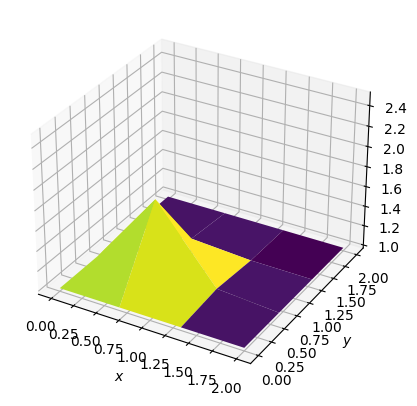

In [15]:
###variable declarations
nx = 4
ny = 4
nt = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [16]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

47.9 µs ± 986 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Function with numba accelerator

In [17]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

48.6 µs ± 567 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Function with pyccel accelerator

In [18]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [19]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

431 ns ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
